In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df = df[df['job_title_short'] == 'Data Analyst']

In [3]:
df_exploded = df.explode('job_skills')

In [9]:
skill_stats = df_exploded.groupby('job_skills').agg(  #here, since we want to do multiple aggregations, we are breaking it down.
    skill_count = ('job_skills', 'count'), # here, we are naming this aggregation variable as skill_count and we want to do this agg on the 'job_skills' col. The agg we want to do on it is 'count'.
    median_salary = ('salary_year_avg', 'median') # here, we are naming this aggregation variable as median_salary and we want to do this agg on the 'salary_year_avg' col. The agg we want to do on it is 'median'.
)

skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

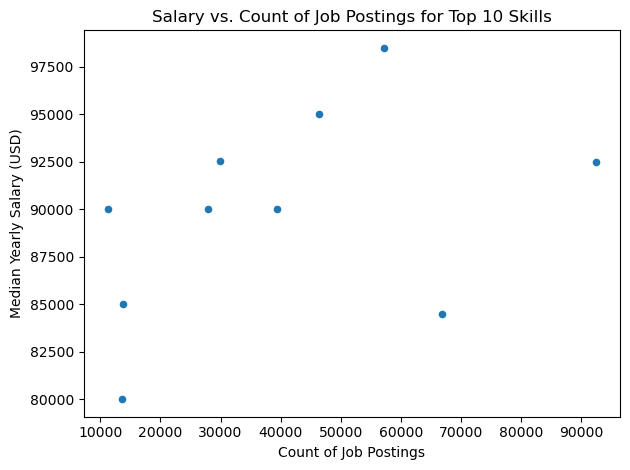

In [11]:
skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

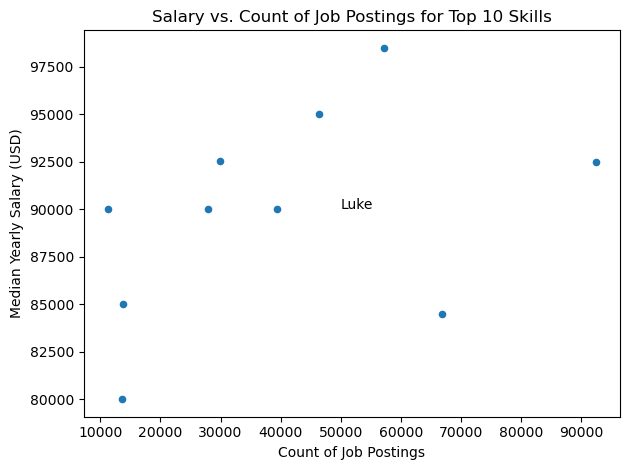

In [13]:
# in the above plot, the names of the job_skills don't appear anywhere. To show them, we need to use the text() function from the pyplot module.

skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

plt.text(50000, 90000, 'Luke') #50000 is the x axis value, 90000 is the y axis value and Luke is the naem u are giving that point
                               #u can either do this list these values in the text() function for all the data points, OR u can use a Python loop to do it for u
plt.show()

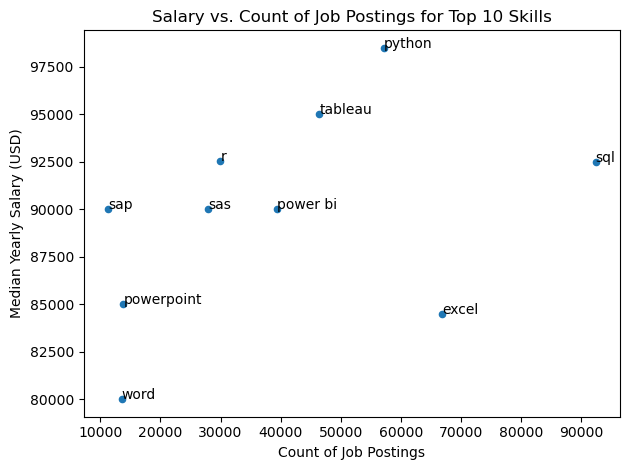

In [17]:
# Using a Python loop to name all the data points for us in the scatter plot:

skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt) 

plt.show()